In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



In [5]:
data = pd.read_csv("/content/IMDB_Dataset.csv")

In [6]:
data.shape

(50000, 2)

In [7]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [8]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

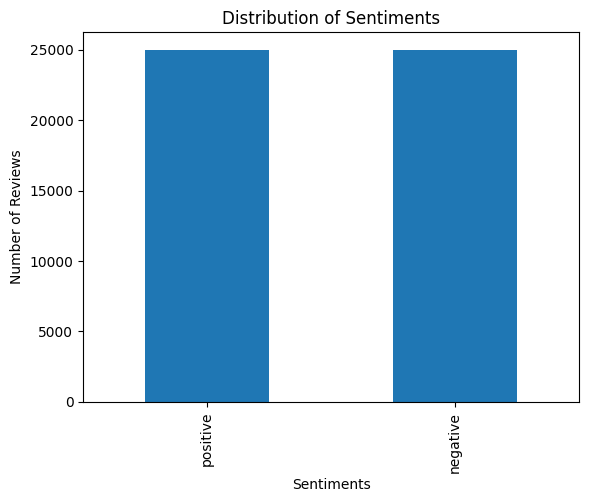

In [9]:
count= data['sentiment'].value_counts()
count.plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Number of Reviews')
plt.show()

In [10]:
data["review"] = data["review"].str.lower()
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [11]:
def removeHTML(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

data["review"] = data["review"].apply(lambda text: removeHTML(text))
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [12]:
def removeSplCh(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

data["review"] = data["review"].apply(removeSplCh)
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


In [13]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
stopWord = stopwords.words('english')
print(len(stopWord))
print(stopWord)

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [15]:
def removeStopword(text):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return tokens

In [16]:
data["review"] = data["review"].apply(removeStopword)


In [17]:
from collections import Counter

In [18]:
all_text = ' '.join([' '.join(review) for review in data['review'].values])
words = all_text.split()

word_counts = Counter(words)
word_counts


Counter({'one': 50367,
         'of': 288068,
         'the': 650622,
         'other': 17775,
         'reviewers': 500,
         'has': 32881,
         'mentioned': 1029,
         'that': 135786,
         'after': 14398,
         'watching': 8921,
         'just': 34674,
         '1': 2317,
         'oz': 255,
         'episode': 3039,
         'youll': 2604,
         'be': 52714,
         'hooked': 274,
         'they': 41340,
         'are': 58157,
         'right': 6202,
         'as': 90041,
         'this': 145442,
         'is': 210051,
         'exactly': 1951,
         'what': 29436,
         'happened': 1994,
         'with': 86548,
         'methe': 86,
         'first': 16836,
         'thing': 8902,
         'struck': 266,
         'me': 20801,
         'about': 33843,
         'was': 95184,
         'its': 47883,
         'brutality': 134,
         'and': 319377,
         'unflinching': 31,
         'scenes': 10169,
         'violence': 1990,
         'which': 22981,
   

In [19]:
def myStemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in ' '.join(text).split()])
    return text

In [20]:
data['review'] = data['review'].apply(myStemmer)

In [21]:
x = data['review']
y = data['sentiment']

In [22]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size= 0.25)

In [23]:
print("xTrain",xTrain.shape,
     "xTest",xTest.shape,
      "yTrain", yTrain.shape,
      "yTest",yTest.shape)


xTrain (37500,) xTest (12500,) yTrain (37500,) yTest (12500,)


<function matplotlib.pyplot.show(close=None, block=None)>

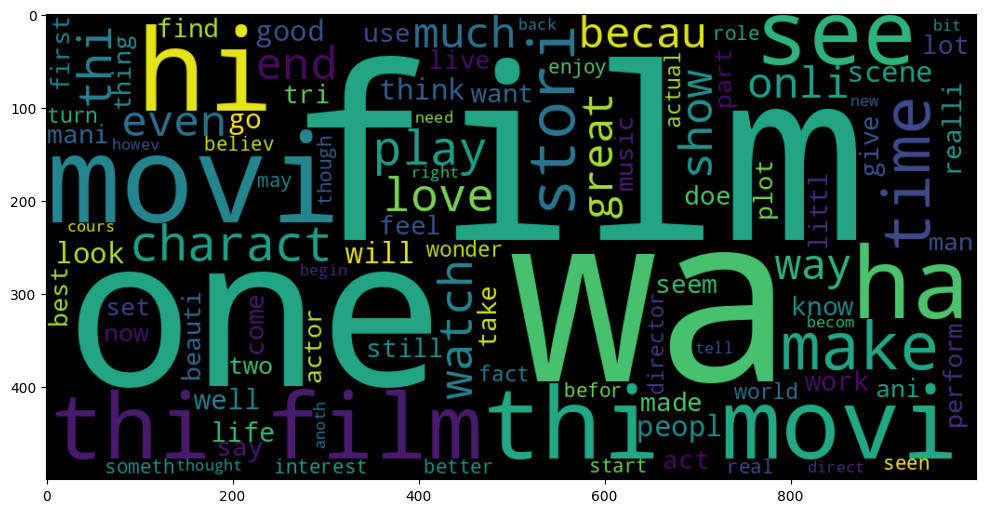

In [24]:
plt.figure(figsize= (12, 12))
dfPosReview = data[data['sentiment'] == 'positive']
posText = ' '.join(review for review in dfPosReview.review)
WC = WordCloud(width = 1000, 
               height = 500,
              max_words= 100)
posWords = WC.generate(posText)
plt.imshow(posWords,
          interpolation= 'bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

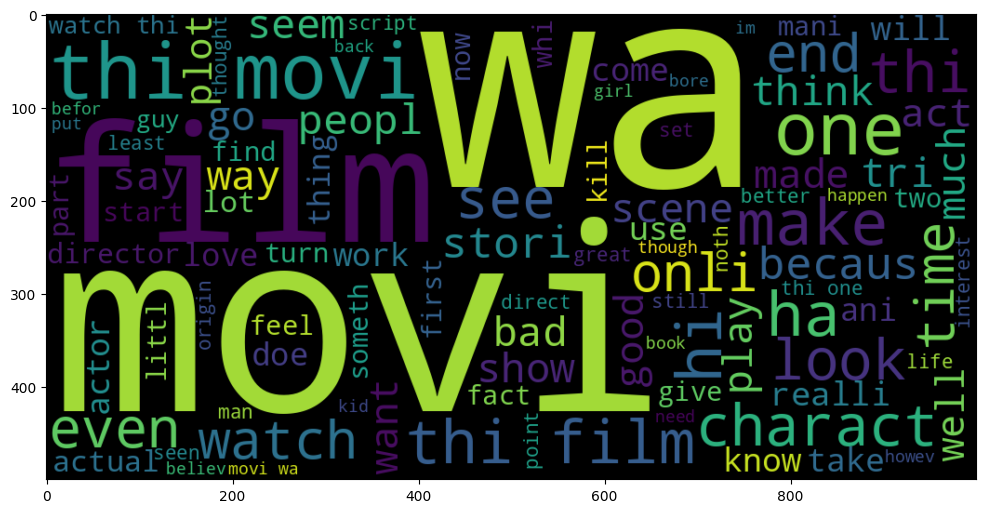

In [25]:
plt.figure(figsize= (12, 12))
dfNegReview = data[data['sentiment'] == 'negative']
negText = ' '.join(review for review in dfNegReview.review)
WC = WordCloud(width = 1000, 
               height = 500,
              max_words= 100)
negWords = WC.generate(negText)
plt.imshow(negWords,
          interpolation= 'bilinear')
plt.show

In [26]:
tf = TfidfVectorizer(min_df=0,
                    max_df=1,
                    use_idf= True,
                    ngram_range= (1, 3))
tfTrainReviews = tf.fit_transform(xTrain)
tfTestReviews = tf.transform(xTest)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()
lr.fit(tfTrainReviews, yTrain)
ypred = lr.predict(tfTestReviews)

In [29]:
tfidfScore = accuracy_score(yTest, ypred)
tfidfScore

0.746

In [30]:
cv = CountVectorizer(min_df= 0,
                    max_df= 1,
                    binary= False,
                    ngram_range= (1, 3))

cvTrainReviews = cv.fit_transform(xTrain)
cvTestReviews = cv.transform(xTest)

In [31]:
lr = LogisticRegression()
lr.fit(cvTrainReviews, yTrain)
ycvpred = lr.predict(cvTestReviews)

cvScore = accuracy_score(yTest, ycvpred)
cvScore

0.65608